In [27]:
# Data Manipulation and Model Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Supervised Learning

# Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Unsupervised Learning
from sklearn.cluster import KMeans # Kmeans

# Data Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Selection
from sklearn.model_selection import train_test_split

# Evaluation Metrics for Classification
from sklearn import metrics

# Evaluation Metrics for Regression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# **_Supervised_**
## $Applying Regression$

### **1. Linear Regression**

In [2]:
# read file 
df_linear_regression = pd.read_csv(r"path\Real estate.csv")

# get the first five rows of you data 
df_linear_regression.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df_linear_regression.shape # check the shape row & columns of your data

(414, 8)

In [4]:
df_linear_regression.info() # check basic info of you data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df_linear_regression.isnull().sum() # check the null values of your data

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df_linear_regression.drop(columns=['No'], axis=1, inplace=True) # drop column since i wasn't required 
df_linear_regression.head() # again check head of your data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df_linear_regression.describe() # check basic statitics of you data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df_linear_regression.corr() # check the correlation of you data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [9]:
x_linear_regression = df_linear_regression.drop(columns=['Y house price of unit area']) # make independent variables (here drop your target varible)
x_linear_regression.head() # check head of your in independent variables

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [10]:
y_linear_regression = df_linear_regression['Y house price of unit area']# make dependent variables (here just select your target varible)
y_linear_regression.head() # check head of your in dependent variable

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [11]:
print("x=",x_linear_regression.shape,"\ny=", y_linear_regression.shape) # check the shape of you x and y varibales

x= (414, 6) 
y= (414,)


In [12]:
from sklearn.model_selection import train_test_split # import train test split

# Apply train_test_split and make your training and testinig x and y
x_train_linear_regression, x_test_linear_regression, y_train_linear_regression, y_test_linear_regression = train_test_split(x_linear_regression, y_linear_regression, test_size=0.3, random_state=42)

# check the shape of you training and testinig x and y
print("\nx train shape: ", x_train_linear_regression.shape,"\nx test shape: ", x_test_linear_regression.shape)
print("\ny train shape: ", y_train_linear_regression.shape, "\ny test shape: ", y_test_linear_regression.shape)


x train shape:  (289, 6) 
x test shape:  (125, 6)

y train shape:  (289,) 
y test shape:  (125,)


In [13]:
from sklearn.linear_model import LinearRegression # import Linear Regression

linear_regression = LinearRegression() # call LinearRegression

linear_regression.fit(x_train_linear_regression, y_train_linear_regression) # fit you training x and y in LinearRegression 

LinearRegression()

In [14]:
linear_regression.coef_ # check the Coedicients

array([ 5.84779706e+00, -2.42545813e-01, -5.13873381e-03,  1.07449530e+00,
        2.39096949e+02, -5.22351591e+01])

In [15]:
pd.DataFrame(linear_regression.coef_, x_linear_regression.columns, columns=["Coedicients"]) # making dataframe of Coedicients

,Coedicients
X1 transaction date,5.847797
X2 house age,-0.242546
X3 distance to the nearest MRT station,-0.005139
X4 number of convenience stores,1.074495
X5 latitude,239.096949
X6 longitude,-52.235159


In [16]:
y_pred_linear_regression = linear_regression.predict(x_test_linear_regression) # predict values by linear regression using x test
y_pred_linear_regression[:5] # just to see first five prrdicted values (no necessary)

array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608])

In [17]:
from sklearn import metrics # import metrics 

# check error by placing y test and and y predicted in comparsion 
MAE_linear_regression = metrics.mean_absolute_error(y_test_linear_regression, y_pred_linear_regression)
MSE_linear_regression = metrics.mean_squared_error(y_test_linear_regression, y_pred_linear_regression)
RMSE_linear_regression = metrics.root_mean_squared_error(y_test_linear_regression, y_pred_linear_regression)

print("Logistic Regression MAE", MAE_linear_regression)
print("Logistic Regression MSE", MSE_linear_regression)
print("Logistic Regression RMSE", RMSE_linear_regression)

Logistic Regression MAE 6.1848363400971085
Logistic Regression MSE 73.5683793285023
Logistic Regression RMSE 8.577201136064275


In [18]:
test_residual_linear_regression = y_test_linear_regression - y_pred_linear_regression # check test residual

<Figure size 600x600 with 0 Axes>

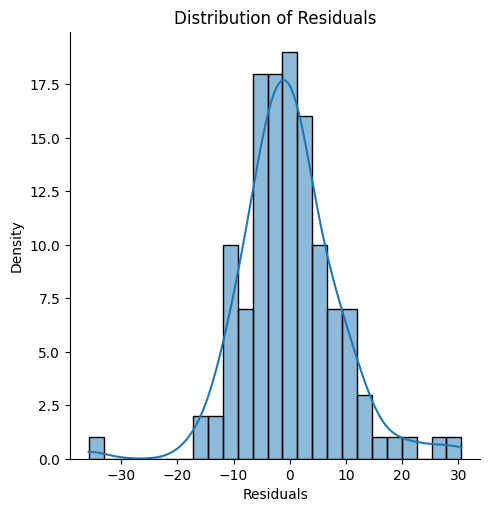

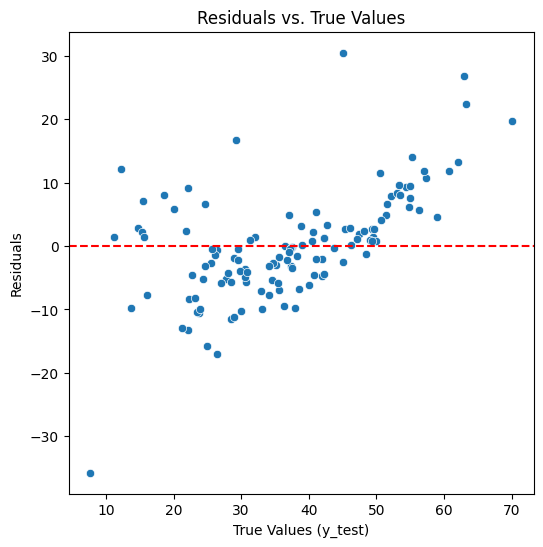

In [19]:
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt  # Import matplotlib

# Plot 1: Distribution of residuals (displot)
plt.figure(figsize=(6, 6))  # Increase figure size for clarity
sns.displot(test_residual_linear_regression, bins=25, kde=True)  # Displot with KDE
plt.title("Distribution of Residuals")  # Add title for clarity
plt.xlabel("Residuals")  # Label the x-axis
plt.ylabel("Density")  # Label the y-axis
plt.show()  # Display the plot

# Plot 2: Scatterplot of residuals vs. true values (y_test)
plt.figure(figsize=(6, 6))  # Increase figure size
sns.scatterplot(x=y_test_linear_regression, y=test_residual_linear_regression)  # Scatter plot
plt.axhline(y=0, color='r', ls='--')  # Red dashed line at y=0
plt.title("Residuals vs. True Values")  # Add title for clarity
plt.xlabel("True Values (y_test)")  # Label the x-axis
plt.ylabel("Residuals")  # Label the y-axis
plt.show()  # Display the plot


___

### **2. Decision Tree** 

In [20]:
# read file 
df_decision_tree = pd.read_csv(r"path\Real estate.csv")

df_decision_tree.head() # see first five rows


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
df_decision_tree.shape # check the shape (rows and columns)

(414, 8)

In [22]:
df_decision_tree.info() # check the basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [23]:
df_decision_tree.drop(columns=['No'], axis=1, inplace=True) # drop `No` bcz its not req.
df_decision_tree.head() # check head after droping `No`

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
df_decision_tree.isnull().sum() # check any null value

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [25]:
df_decision_tree.describe() # check the basic staticts

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [26]:
df_decision_tree.corr() # check the corr relation

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [27]:
x_decision_tree = df_decision_tree.drop(columns=['Y house price of unit area']) # make you independent varibles by droping target varible in them
x_decision_tree.head() # see the head of your independent varibles

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [28]:
y_decision_tree = df_decision_tree['Y house price of unit area'] # select your target variable by picking it up this way
y_decision_tree.head() # check the head of ur dep_var. 

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split # import train_test_split

# split you data in x and y in from of training and testing data 
x_train_decision_tree, x_test_decision_tree, y_train_decision_tree, y_test_decsion_tree = train_test_split(x_decision_tree, y_decision_tree, test_size=0.3, random_state=42)

# check the shape of your training and testing data
print("Training data shape: ", x_train_decision_tree.shape, y_train_decision_tree.shape)
print("Testing data shape: ", x_test_decision_tree.shape, y_test_decsion_tree.shape)

Training data shape:  (289, 6) (289,)
Testing data shape:  (125, 6) (125,)


In [30]:
from sklearn.tree import DecisionTreeRegressor # import decision tre

decision_tree = DecisionTreeRegressor(random_state=42) # call decision tree in a varible 

decision_tree.fit(x_train_decision_tree, y_train_decision_tree) # fit ur training data  

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred_decision_tree = decision_tree.predict(x_test_decision_tree) # predict values by decision tree by using `x_test_decision_tree`
y_pred_decision_tree[:5] # just to see first five predicted values

array([48.6, 38.9, 43.5, 29.3, 25.7])

In [ ]:
from sklearn import metrics # import metrics

# check the eroor value
MAE_decision_tree = metrics.mean_absolute_error(y_test_decsion_tree, y_pred_decision_tree)
MSE_decision_tree = metrics.mean_squared_error(y_test_decsion_tree, y_pred_decision_tree)
RMSE_decision_tree = metrics.root_mean_squared_error(y_test_decsion_tree, y_pred_decision_tree)

# print error values
print("Decision Tree MAE", MAE_decision_tree)
print("Decision Tree MSE", MSE_decision_tree)
print("Decision Tree RMSE", RMSE_decision_tree)

Decision Tree MAE 5.6076
Decision Tree MSE 73.4509
Decision Tree RMSE 8.570350051193943


In [33]:
test_residual_decision_tree = y_test_decsion_tree - y_pred_decision_tree
test_residual_decision_tree

358    -3.5
350     3.4
373     8.7
399     8.0
369    -2.9
       ... 
268    -0.5
148    26.9
16      0.4
66     -3.7
341    -9.4
Name: Y house price of unit area, Length: 125, dtype: float64

<Figure size 600x600 with 0 Axes>

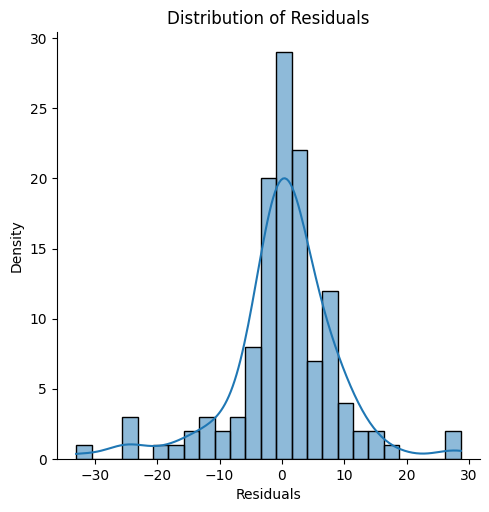

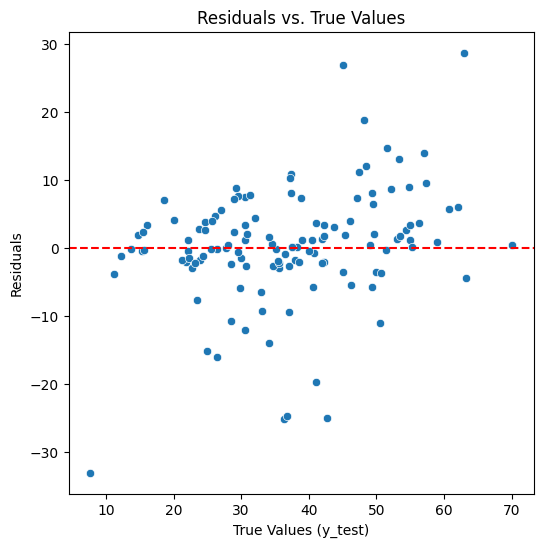

In [34]:
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt  # Import matplotlib

# Plot 1: Distribution of residuals (displot)
plt.figure(figsize=(6, 6))  # Increase figure size for clarity
sns.displot(test_residual_decision_tree, bins=25, kde=True)  # Displot with KDE
plt.title("Distribution of Residuals")  # Add title for clarity
plt.xlabel("Residuals")  # Label the x-axis
plt.ylabel("Density")  # Label the y-axis
plt.show()  # Display the plot

# Plot 2: Scatterplot of residuals vs. true values (y_test)
plt.figure(figsize=(6, 6))  # Increase figure size
sns.scatterplot(x=y_test_decsion_tree, y=test_residual_decision_tree)  # Scatter plot
plt.axhline(y=0, color='r', ls='--')  # Red dashed line at y=0
plt.title("Residuals vs. True Values")  # Add title for clarity
plt.xlabel("True Values (y_test)")  # Label the x-axis
plt.ylabel("Residuals")  # Label the y-axis
plt.show()  # Display the plot

###### things are approxly same I will not use comment and and not repeat same steps

___

### **3. Random Foest**

In [35]:
df_random_forest = pd.read_csv(r"path\Real estate.csv")
df_random_forest.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [36]:
df_random_forest.drop(columns=['No'], axis=True, inplace=True)
x_random_forest = df_random_forest.drop(columns=['Y house price of unit area'])
y_random_forest = df_random_forest['Y house price of unit area']

In [37]:
x_train_random_forest, x_test_random_forest, y_train_random_forest, y_test_random_forest = train_test_split(x_random_forest, y_random_forest, test_size=0.3, random_state=42)

In [38]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train_random_forest, y_train_random_forest)

RandomForestRegressor(random_state=42)

In [39]:
y_pred_random_forest = random_forest.predict(x_test_random_forest)
y_pred_random_forest[:5]

array([49.153  , 38.522  , 53.18325, 35.144  , 25.453  ])

In [40]:
print("MAE Random Froest", metrics.mean_absolute_error(y_test_random_forest, y_pred_random_forest))
print("MSE Random Froest", metrics.mean_squared_error(y_test_random_forest, y_pred_random_forest))
print("RMSE Random Froest", metrics.root_mean_squared_error(y_test_random_forest, y_pred_random_forest))

MAE Random Froest 4.397113295238097
MSE Random Froest 42.75048519970811
RMSE Random Froest 6.538385519354767


In [41]:
test_residual_random_forest = y_test_random_forest - y_pred_random_forest
test_residual_random_forest

358    -4.05300
350     3.77800
373    -0.98325
399     2.15600
369    -2.65300
         ...   
268    -2.35360
148    19.87900
16      2.31025
66     -1.42950
341    -1.53900
Name: Y house price of unit area, Length: 125, dtype: float64

<Figure size 600x600 with 0 Axes>

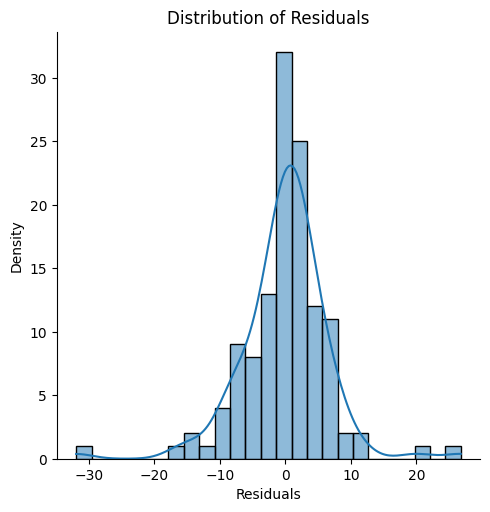

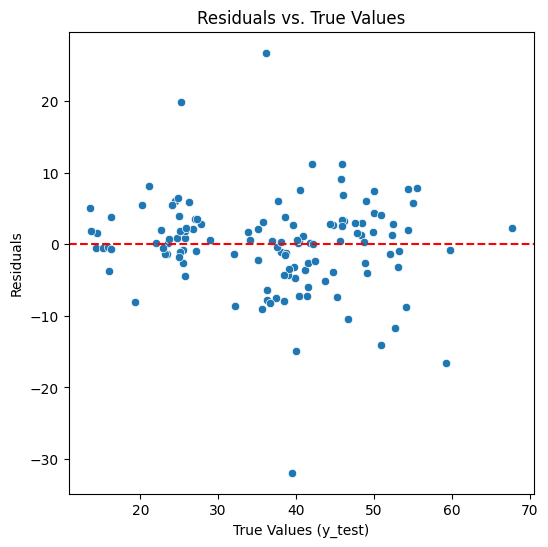

In [42]:
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt  # Import matplotlib

# Plot 1: Distribution of residuals (displot)
plt.figure(figsize=(6, 6))  # Increase figure size for clarity
sns.displot(test_residual_random_forest, bins=25, kde=True)  # Displot with KDE
plt.title("Distribution of Residuals")  # Add title for clarity
plt.xlabel("Residuals")  # Label the x-axis
plt.ylabel("Density")  # Label the y-axis
plt.show()  # Display the plot

# Plot 2: Scatterplot of residuals vs. true values (y_test)
plt.figure(figsize=(6, 6))  # Increase figure size
sns.scatterplot(x=y_pred_random_forest, y=test_residual_random_forest)  # Scatter plot
plt.axhline(y=0, color='r', ls='--')  # Red dashed line at y=0
plt.title("Residuals vs. True Values")  # Add title for clarity
plt.xlabel("True Values (y_test)")  # Label the x-axis
plt.ylabel("Residuals")  # Label the y-axis
plt.show()  # Display the plot

___

### **4. SVM**

In [43]:
df_svm = pd.read_csv(r"path\Real estate.csv")
df_svm.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [44]:
df_svm.drop(columns=['No'], axis=1, inplace=True)

In [45]:
x_svm = df_svm.drop(columns=['Y house price of unit area'])
y_svm = df_svm['Y house price of unit area']

In [46]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.3, random_state=42)

In [47]:
svm = SVR()
svm.fit(x_train_svm, y_train_svm)

SVR()

In [48]:
y_pred_svm = svm.predict(x_test_svm)
y_pred_svm[:5]

array([43.90987572, 41.32920139, 43.27836755, 44.0793227 , 25.17732503])

In [49]:
print("MAE SVM: ", metrics.mean_absolute_error(y_test_svm, y_pred_svm))
print("MSE SVM: ", metrics.mean_squared_error(y_test_svm, y_pred_svm))
print("RMSE SVM: ", metrics.root_mean_squared_error(y_test_svm, y_pred_svm))

MAE SVM:  6.882396075217186
MSE SVM:  85.34235717951594
RMSE SVM:  9.23809272412417


In [50]:
test_residual_svm = y_test_svm - y_pred_svm
test_residual_svm

358     1.190124
350     0.970799
373     8.921632
399    -6.779323
369    -2.377325
         ...    
268    -2.171528
148    24.718366
16     26.977536
66      6.790088
341    -1.707198
Name: Y house price of unit area, Length: 125, dtype: float64

<Figure size 600x600 with 0 Axes>

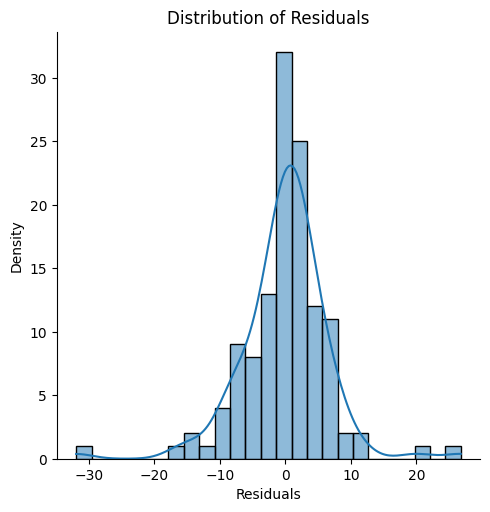

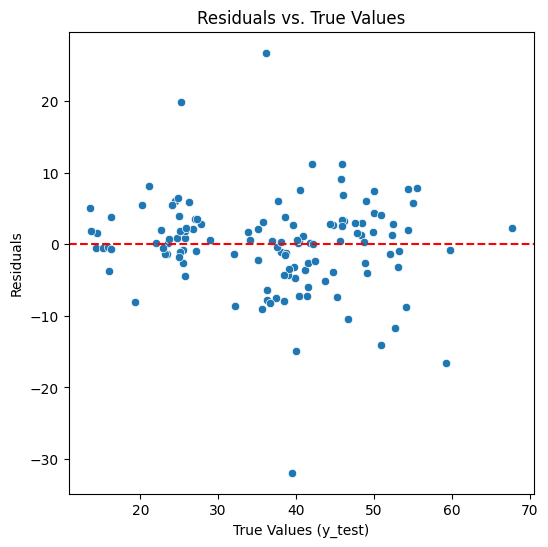

In [51]:
plt.figure(figsize=(6, 6))  
sns.displot(test_residual_random_forest, bins=25, kde=True)  
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")  
plt.ylabel("Density")  
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_random_forest, y=test_residual_random_forest)
plt.axhline(y=0, color='r', ls='--') 
plt.title("Residuals vs. True Values")
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals")
plt.show()

___

### **5. KNN**

In [52]:
df_knn = pd.read_csv(r"path\Real estate.csv")
df_knn.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [53]:
df_knn.drop(columns=['No'], axis=1, inplace=True)
x_knn = df_knn.drop(columns=['Y house price of unit area'])
y_knn = df_knn['Y house price of unit area']

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, test_size=0.3, random_state=42)

knn = KNeighborsRegressor()
knn.fit(x_train_knn, y_train_knn)

KNeighborsRegressor()

In [54]:
y_pred_knn = knn.predict(x_test_knn)
y_pred_knn[:5]

array([49.82, 39.16, 46.06, 38.98, 26.3 ])

In [55]:
print("MAE KNN: ", metrics.mean_absolute_error(y_test_knn, y_pred_knn))
print("MSE KNN: ", metrics.mean_squared_error(y_test_knn, y_pred_knn))
print("RMSE KNN: ", metrics.root_mean_squared_error(y_test_knn, y_pred_knn))

MAE KNN:  5.45248
MSE KNN:  62.8123712
RMSE KNN:  7.925425616331277


In [56]:
test_residual_knn = y_test_knn - y_pred_knn
test_residual_knn

358    -4.72
350     3.14
373     6.14
399    -1.68
369    -3.50
       ...  
268     1.72
148    22.74
16      5.68
66     -0.46
341    -5.56
Name: Y house price of unit area, Length: 125, dtype: float64

<Figure size 600x600 with 0 Axes>

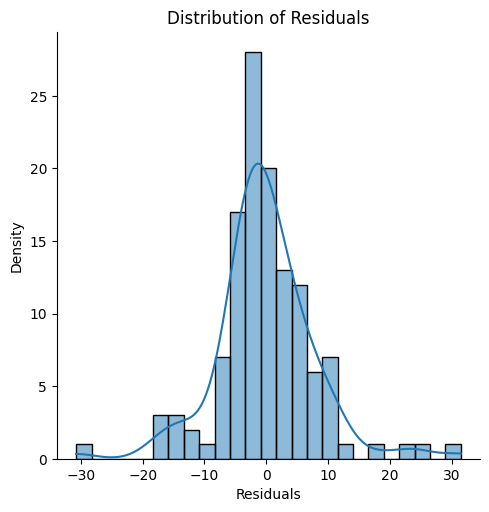

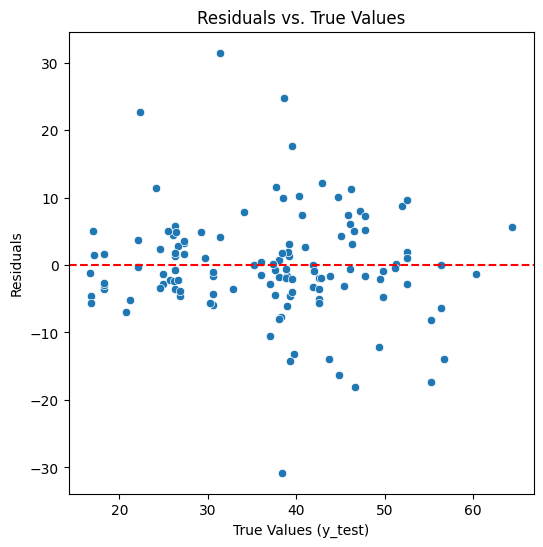

In [57]:
plt.figure(figsize=(6, 6))  
sns.displot(test_residual_knn, bins=25, kde=True)  
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")  
plt.ylabel("Density")  
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_knn, y=test_residual_knn)
plt.axhline(y=0, color='r', ls='--') 
plt.title("Residuals vs. True Values")
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals")
plt.show()

___

# **Comparison**

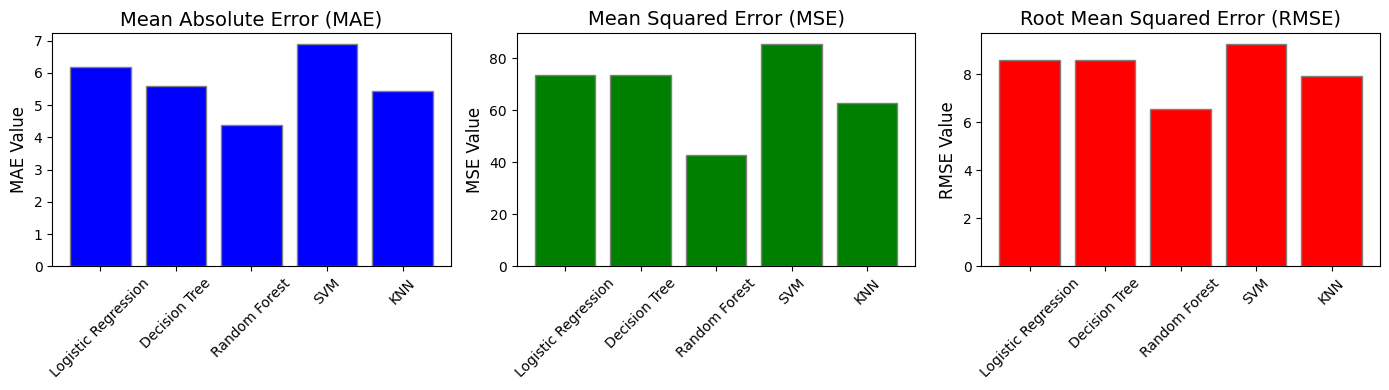

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dictionary with the results for each model and each metric
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'MAE': [6.1848363400971085, 5.6076, 4.397113295238097, 6.882396075217186, 5.45248],
    'MSE': [73.5683793285023, 73.4509, 42.75048519970811, 85.34235717951594, 62.8123712],
    'RMSE': [8.577201136064275, 8.570350051193943, 6.538385519354767, 9.23809272412417, 7.925425616331277]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Create a figure and axis with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot MAE, MSE, and RMSE in separate subplots

# MAE subplot
axes[0].bar(df['Model'], df['MAE'], color='b', edgecolor='grey')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_ylabel('MAE Value', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# MSE subplot
axes[1].bar(df['Model'], df['MSE'], color='g', edgecolor='grey')
axes[1].set_title('Mean Squared Error (MSE)', fontsize=14)
axes[1].set_ylabel('MSE Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# RMSE subplot
axes[2].bar(df['Model'], df['RMSE'], color='r', edgecolor='grey')
axes[2].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axes[2].set_ylabel('RMSE Value', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


___
___
___

## $Applying Classification$

###### Making one df and x and y and training and testing data

### **1. Logistic Regression**

In [59]:
import pandas as pd
df = pd.read_csv(r"path\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [61]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [62]:
categorical_columns = df.select_dtypes(object).columns

label_encoder = LabelEncoder()
df1 = df.copy()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df[column])

df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [63]:
x = df1.drop(columns=['deposit'])
y = df1['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [64]:
logistic_regression = LogisticRegression()

logistic_regression.fit(x_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred_logistic_regression = logistic_regression.predict(x_test)
y_pred_logistic_regression[:5]

array([0, 1, 1, 1, 0])

In [66]:
print("Logistic Regression Classification Report: \n", metrics.classification_report(y_test, y_pred_logistic_regression))
print("\n\nLogistic Regression Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_logistic_regression))
print("\n\n\nLogistic Regression Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_logistic_regression))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1742
           1       0.76      0.69      0.72      1607

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



Logistic Regression Confusion Matrix: 
 [[1393  349]
 [ 496 1111]]



Logistic Regression Accuracy Score: 
 0.7476858763810093


___

### **2. Decision Tree**

In [67]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred_decision_tree = decision_tree.predict(x_test)
y_pred_decision_tree[:5]

array([0, 1, 0, 1, 0])

In [69]:
print("Decision Tree Classification Report: \n", metrics.classification_report(y_test, y_pred_decision_tree))
print("\n\nDecision Tree Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_decision_tree))
print("\n\nDecision Tree Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_decision_tree))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1742
           1       0.77      0.76      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



Decision Tree Confusion Matrix: 
 [[1379  363]
 [ 380 1227]]


Decision Tree Accuracy Score: 
 0.7781427291728874


___

### **3. Random Forest**

In [70]:
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
y_pred_random_forest = random_forest.predict(x_test)
y_pred_random_forest[:5]

array([1, 1, 1, 1, 0])

In [72]:
print("Random Forest Classification Report: \n", metrics.classification_report(y_test, y_pred_random_forest))
print("\n\nRandom Forest Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_random_forest))
print("\n\nRandom Forest Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_random_forest))

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1742
           1       0.81      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



Random Forest Confusion Matrix: 
 [[1418  324]
 [ 213 1394]]


Random Forest Accuracy Score: 
 0.8396536279486414


___

### **4. SVM**

In [73]:
svm = RandomForestClassifier()

svm.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
y_pred_svm = svm.predict(x_test)
y_pred_svm[:5]

array([1, 1, 1, 1, 0])

In [75]:
print("SVM Classification Report: \n", metrics.classification_report(y_test, y_pred_svm))
print("\n\nSVM Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_svm))
print("\n\nSVM Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_svm))

SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1742
           1       0.81      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



SVM Confusion Matrix: 
 [[1423  319]
 [ 214 1393]]


SVM Accuracy Score: 
 0.8408480143326366


____

### **6. KNN** 

In [76]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred_knn = knn.predict(x_test)
y_pred_knn[:5]

array([0, 1, 1, 1, 0])

In [78]:
print("KNN Classification Report: \n", metrics.classification_report(y_test, y_pred_knn))
print("\n\nKNN Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_knn))
print("\n\nKNN Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_knn))

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1742
           1       0.74      0.72      0.73      1607

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



KNN Confusion Matrix: 
 [[1330  412]
 [ 445 1162]]


KNN Accuracy Score: 
 0.7441027172290235


___

### **7. Navie Bayes**

In [79]:
nb = GaussianNB()

nb.fit(x_train, y_train)

GaussianNB()

In [80]:
y_pred_nb = nb.predict(x_test)
y_pred_nb[:5]

array([1, 1, 1, 1, 0])

In [81]:
print("NB Classification Report: \n", metrics.classification_report(y_test, y_pred_nb))
print("\n\nNB Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_nb))
print("\n\nNB Accuracy Score: \n", metrics.accuracy_score(y_test, y_pred_nb))

NB Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1742
           1       0.72      0.78      0.75      1607

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



NB Confusion Matrix: 
 [[1256  486]
 [ 353 1254]]


NB Accuracy Score: 
 0.7494774559570021


___

# **Comparison**

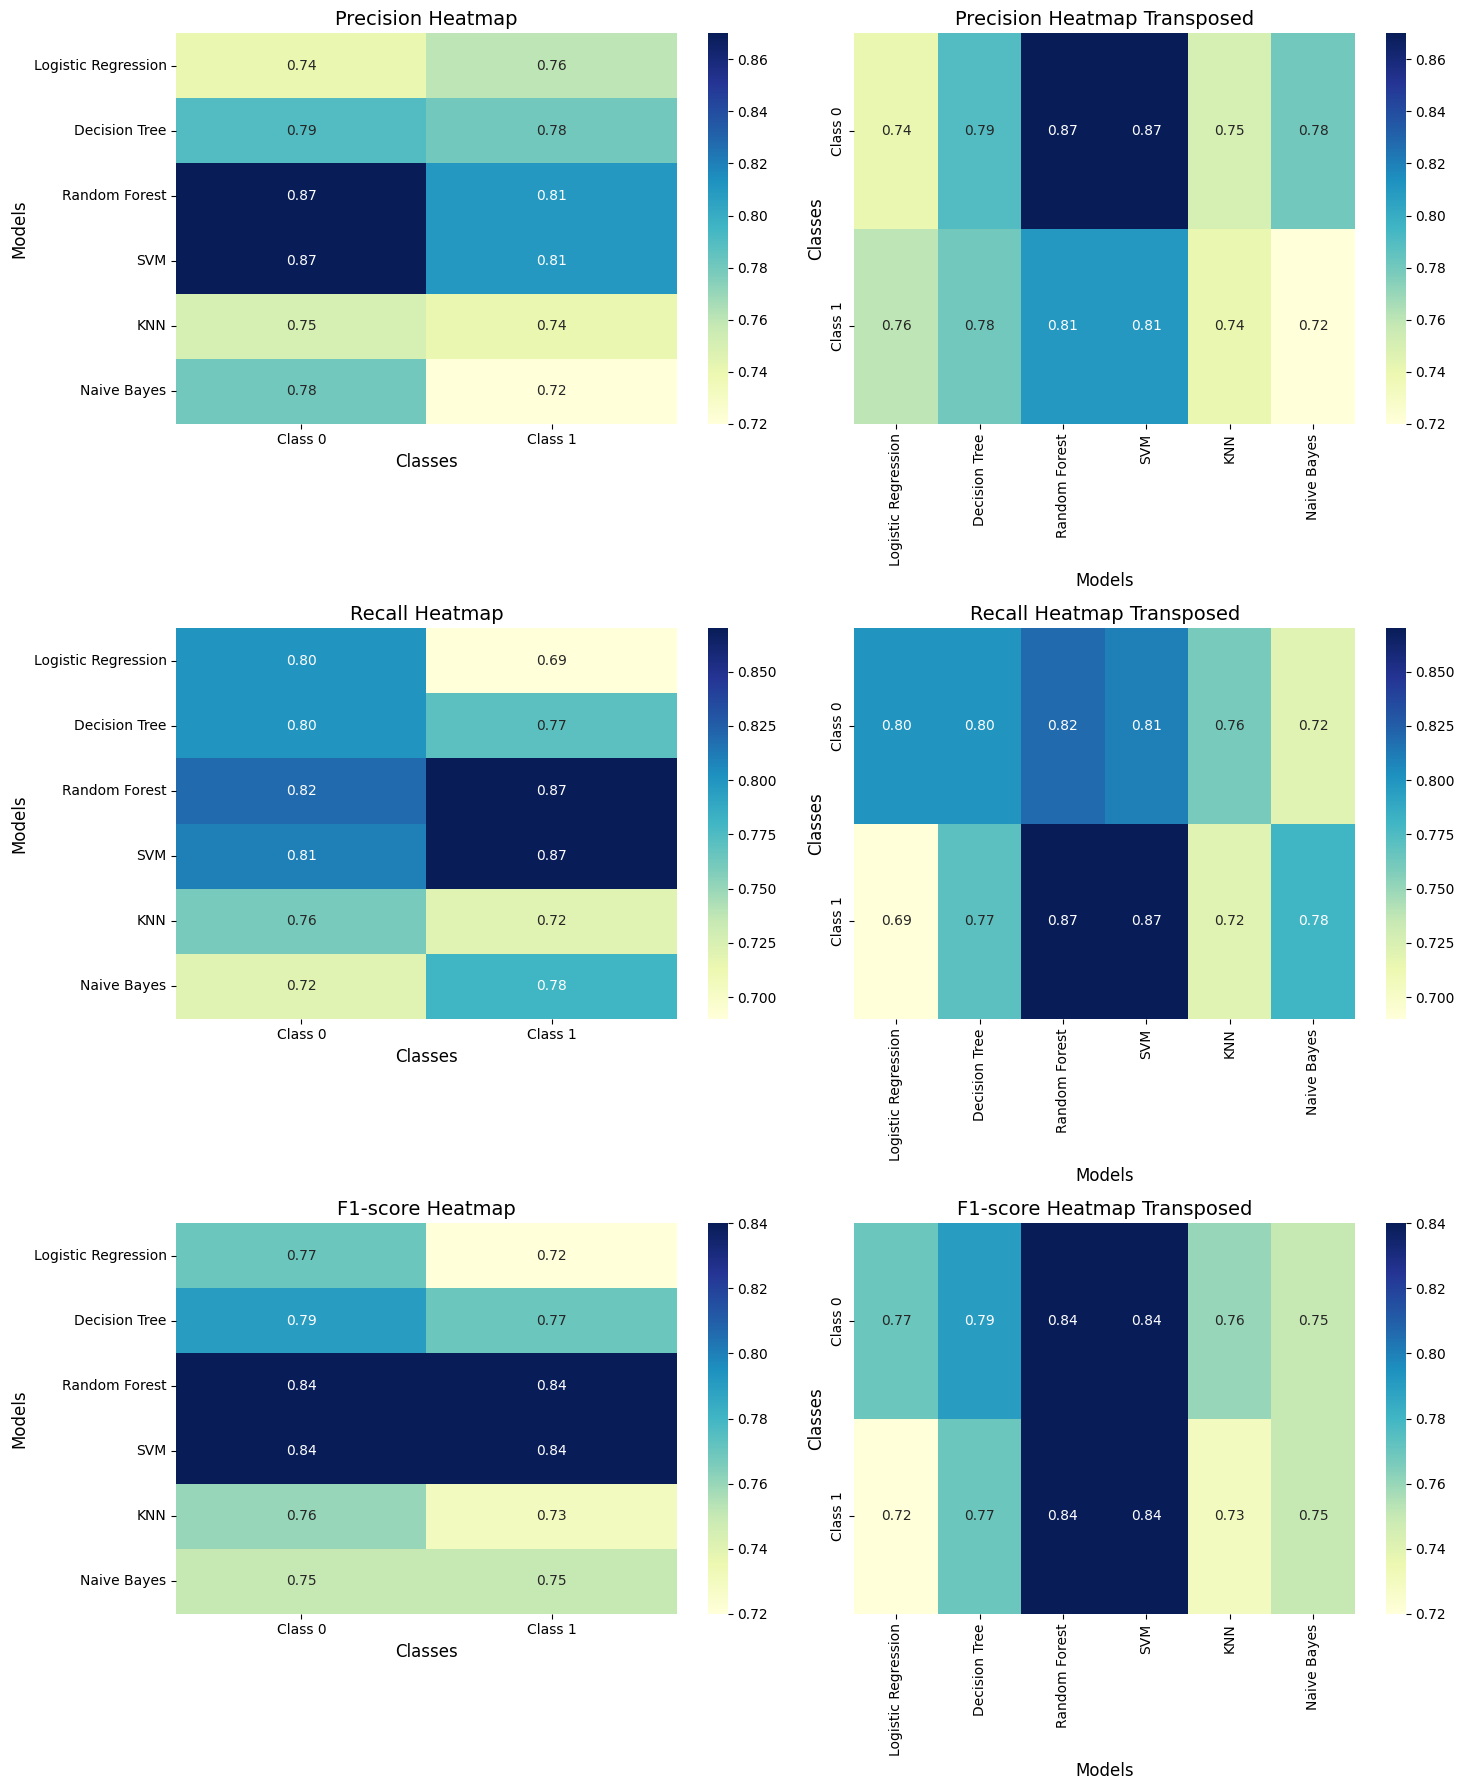

In [82]:
# Sample classification report strings for each model
classification_reports = {
    'Logistic Regression': {
        'precision': [0.74, 0.76],
        'recall': [0.80, 0.69],
        'f1-score': [0.77, 0.72],
    },
    'Decision Tree': {
        'precision': [0.79, 0.78],
        'recall': [0.80, 0.77],
        'f1-score': [0.79, 0.77],
    },
    'Random Forest': {
        'precision': [0.87, 0.81],
        'recall': [0.82, 0.87],
        'f1-score': [0.84, 0.84],
    },
    'SVM': {
        'precision': [0.87, 0.81],
        'recall': [0.81, 0.87],
        'f1-score': [0.84, 0.84],
    },
    'KNN': {
        'precision': [0.75, 0.74],
        'recall': [0.76, 0.72],
        'f1-score': [0.76, 0.73],
    },
    'Naive Bayes': {
        'precision': [0.78, 0.72],
        'recall': [0.72, 0.78],
        'f1-score': [0.75, 0.75],
    },
}

# Create a figure with 3 rows and 2 columns (for precision, recall, f1-score)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Define the metrics labels (precision, recall, f1-score)
metrics = ['precision', 'recall', 'f1-score']

# Loop through each metric and plot the heatmap for each model
for i, metric in enumerate(metrics):
    # Prepare a list of model names and corresponding metric values
    values = []
    for model in classification_reports:
        values.append(classification_reports[model][metric])
    
    # Convert the values into a DataFrame
    df = pd.DataFrame(values, columns=['Class 0', 'Class 1'], index=classification_reports.keys())

    # Plot the heatmap in the corresponding subplot
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", ax=axes[i][0])
    axes[i][0].set_title(f'{metric.capitalize()} Heatmap', fontsize=14)
    axes[i][0].set_ylabel('Models', fontsize=12)
    axes[i][0].set_xlabel('Classes', fontsize=12)

    # Now move to next column (to keep the layout of each model in a new column)
    sns.heatmap(df.T, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f", ax=axes[i][1])
    axes[i][1].set_title(f'{metric.capitalize()} Heatmap Transposed', fontsize=14)
    axes[i][1].set_ylabel('Classes', fontsize=12)
    axes[i][1].set_xlabel('Models', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

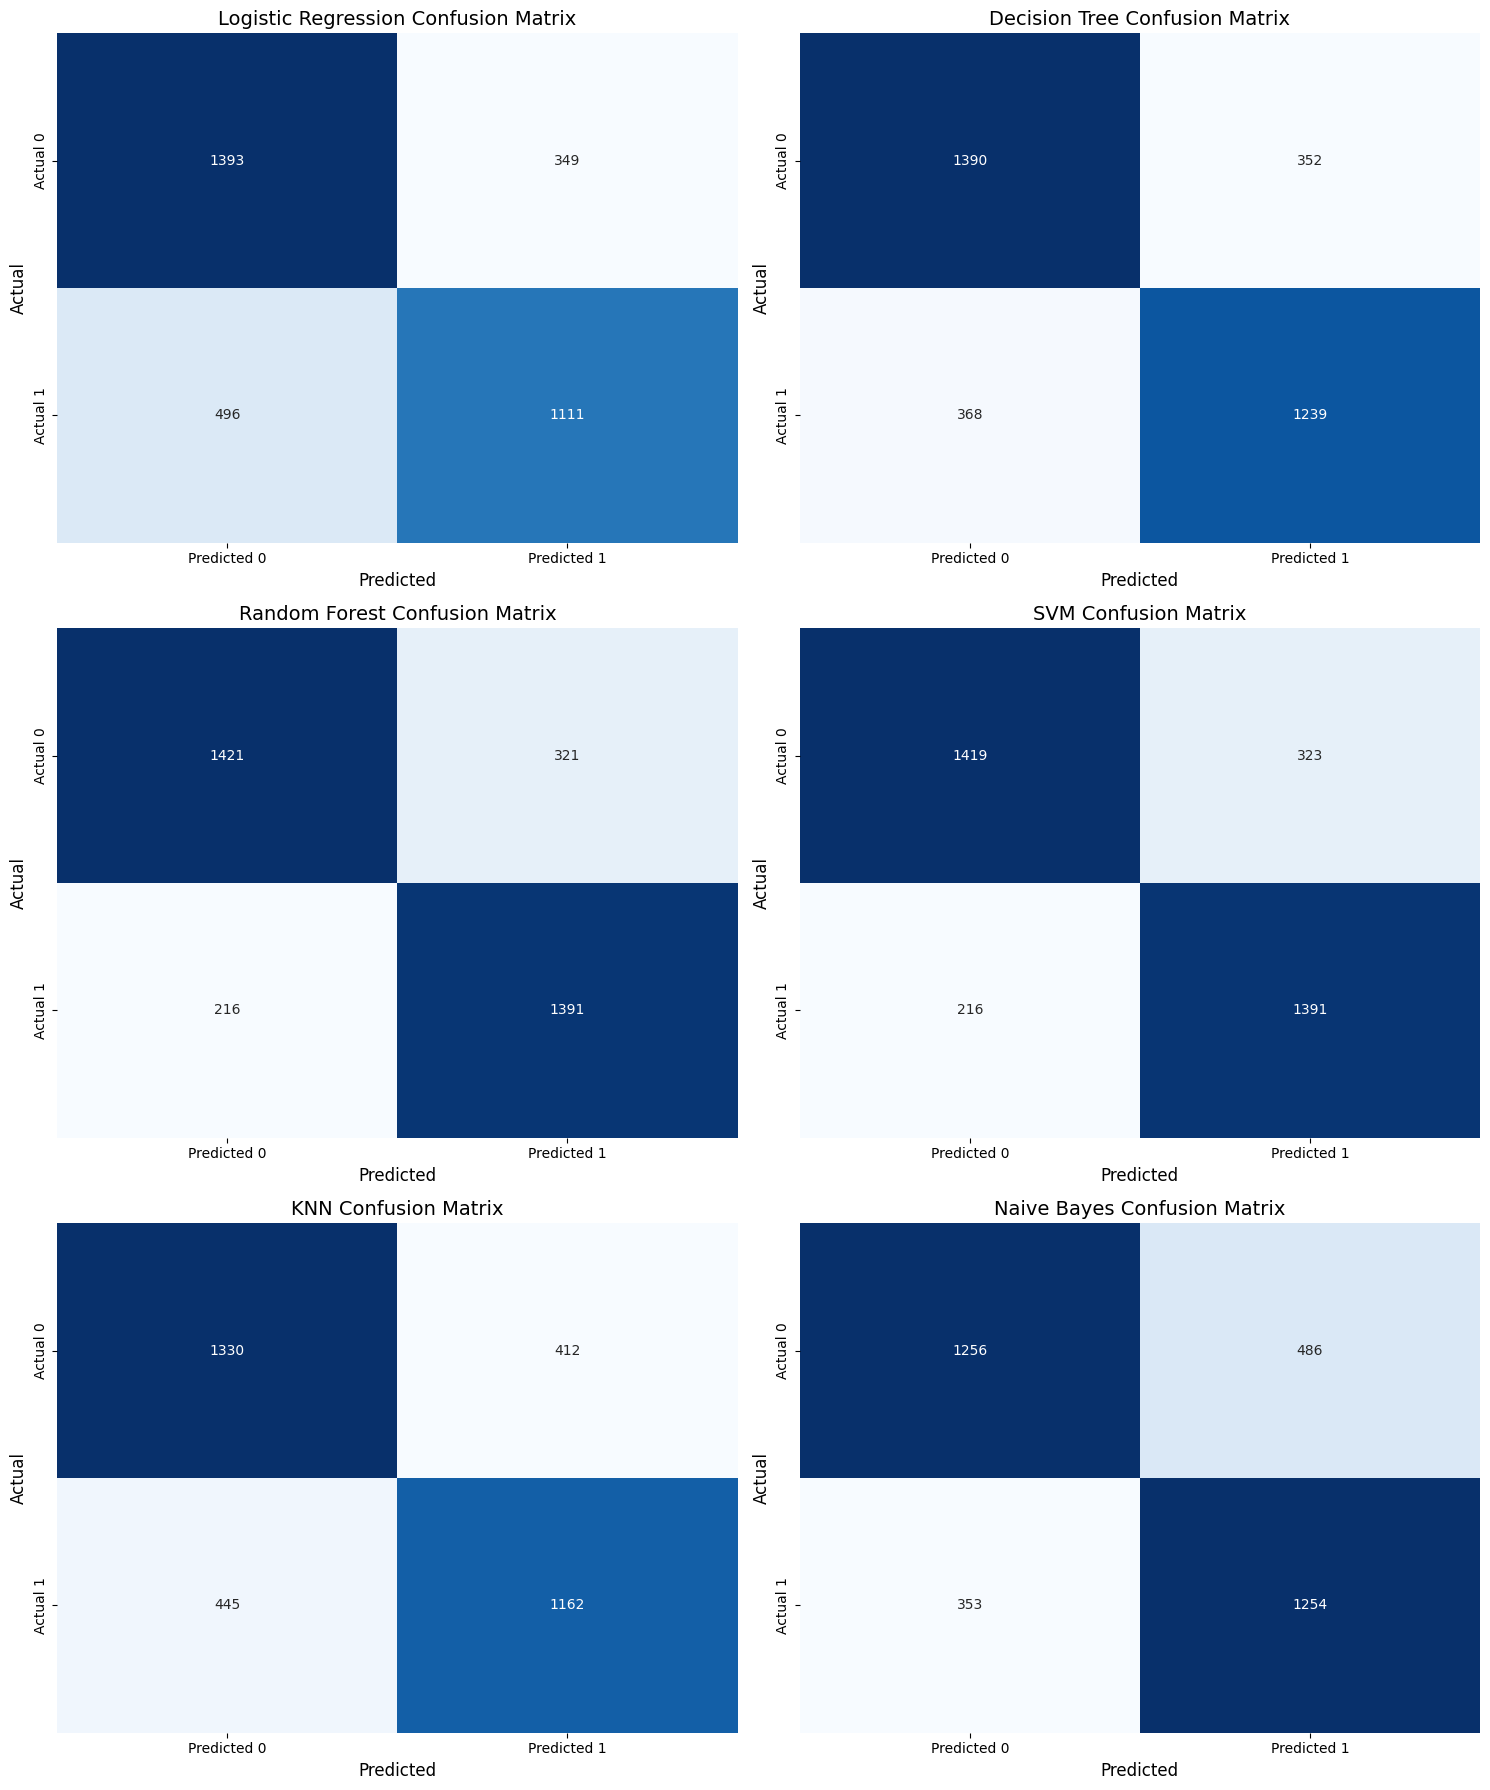

In [83]:
# Confusion matrices for each model
confusion_matrices = {
    'Logistic Regression': np.array([[1393, 349], [496, 1111]]),
    'Decision Tree': np.array([[1390, 352], [368, 1239]]),
    'Random Forest': np.array([[1421, 321], [216, 1391]]),
    'SVM': np.array([[1419, 323], [216, 1391]]),
    'KNN': np.array([[1330, 412], [445, 1162]]),
    'Naive Bayes': np.array([[1256, 486], [353, 1254]])
}

# Create a figure with 3 rows and 2 columns (for 6 models)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Loop through each confusion matrix and plot the heatmap
for i, (model, matrix) in enumerate(confusion_matrices.items()):
    row, col = divmod(i, 2)  # Determine the row and column for subplot

    # Plot the heatmap for the confusion matrix
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", cbar=False, ax=axes[row][col],
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    
    # Set the title and labels for the subplot
    axes[row][col].set_title(f'{model} Confusion Matrix', fontsize=14)
    axes[row][col].set_xlabel('Predicted', fontsize=12)
    axes[row][col].set_ylabel('Actual', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_19280\2162836733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


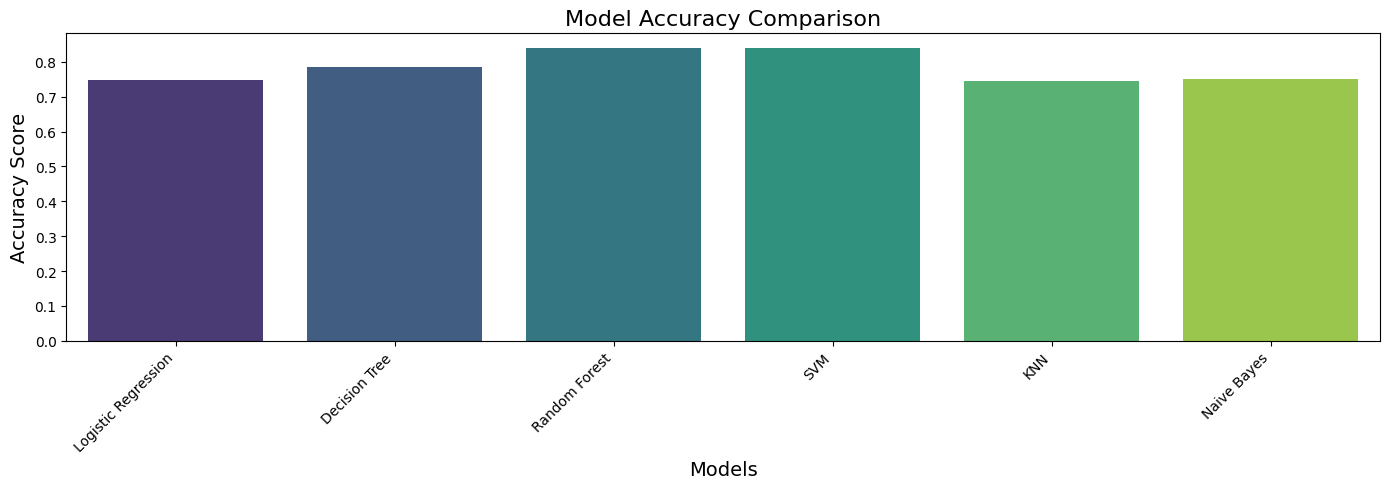

In [84]:
# Data: Models and their corresponding accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracy_scores = [0.7476858763810093, 0.78501045088086, 0.8396536279486414, 
                   0.8390564347566438, 0.7441027172290235, 0.7494774559570021]

# Create a bar chart
plt.figure(figsize=(14, 5))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')

# Set titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

___

# THE END @:-)
___
___
___